In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Importing Dataset
df = pd.read_csv(r'D:\Projects\movie recommendation system\IMDb movies.csv', low_memory=False)

In [4]:
# Basic EDA
df.shape

(85855, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [6]:
# Checking for duplicates
df.duplicated(subset='imdb_title_id').sum()

0

In [7]:
df.nunique()

imdb_title_id            85855
title                    82094
original_title           80852
year                       113
date_published           22012
genre                     1257
duration                   266
country                   4907
language                  4377
director                 34733
writer                   66859
production_company       32050
actors                   85729
description              83611
avg_vote                    89
votes                    14933
budget                    4642
usa_gross_income         14857
worlwide_gross_income    30414
metascore                   99
reviews_from_users        1213
reviews_from_critics       595
dtype: int64

In [8]:
# Creating new dataframe, keeping only required columns
new_df = df[['title','year', 'genre', 'duration', 'country', 'director', 'writer', 'production_company', 'actors', 'avg_vote']]
new_df.isna().sum()

title                    0
year                     0
genre                    0
duration                 0
country                 64
director                87
writer                1572
production_company    4455
actors                  69
avg_vote                 0
dtype: int64

In [9]:
# Dropping null values
new_df = new_df.dropna()
new_df.isna().sum()

title                 0
year                  0
genre                 0
duration              0
country               0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
dtype: int64

In [20]:
new_df = new_df[new_df.year != 'TV Movie 2019']
new_df['year'] = new_df['year'].astype(int)

# Restricting Dataset to Movie Released Year till 1980 to reduce complexity of graphs
indexNames = new_df[new_df['year'] < 1980].index
new_df.drop(indexNames, inplace = True)

In [21]:
# Seperating countries
countries = {}
country_list = list(new_df['country'])
for i in country_list:
    i = list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=0
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [22]:
# Segregating genres 
genre = list(new_df['genre'])
genre_list = []

for i in genre:
    i = list(i.split(','))
    for j in i:
        genre_list.append(j.replace(' ', ''))

g = Counter(genre_list)


In [33]:
# groupby year and count how many title we have each year

title = new_df.groupby('year').agg({'title': ['count']})
title.columns = ['Title Count']
title = title.sort_values('Title Count', ascending = False)
title

,Title Count
year,
2017,3010
2018,2957
2016,2895
2015,2742
2014,2675
2013,2574
2019,2552
2012,2354
2011,2244


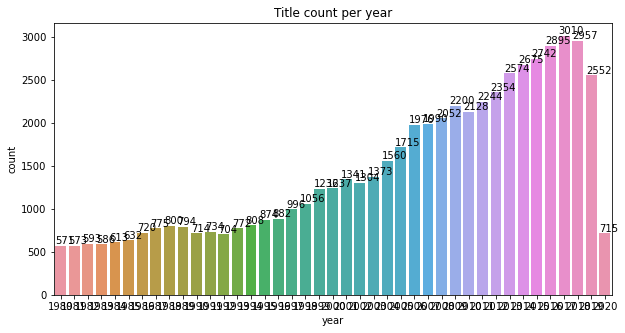

In [24]:
# Visualization with count on bar graph in ascending year order

fig_dim = (10,5)
fig, ax = plt.subplots(figsize = fig_dim)
ax = sns.countplot(x = 'year', data = new_df)
plt.title('Title count per year')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height() + 20))

In [34]:
# Best year by Average Rating of the year

best = new_df.groupby('year').agg({'avg_vote': ['mean']})
best.columns = ['Average rating']
best = best.sort_values('Average rating', ascending = False)
best

,Average rating
year,
1981,6.178709
1982,6.116695
1980,6.104378
1984,6.090865
1983,6.069625
1985,6.012816
1991,6.005722
1992,5.985227
1986,5.961111


Text(0, 0.5, 'Average rating (out of 10)')

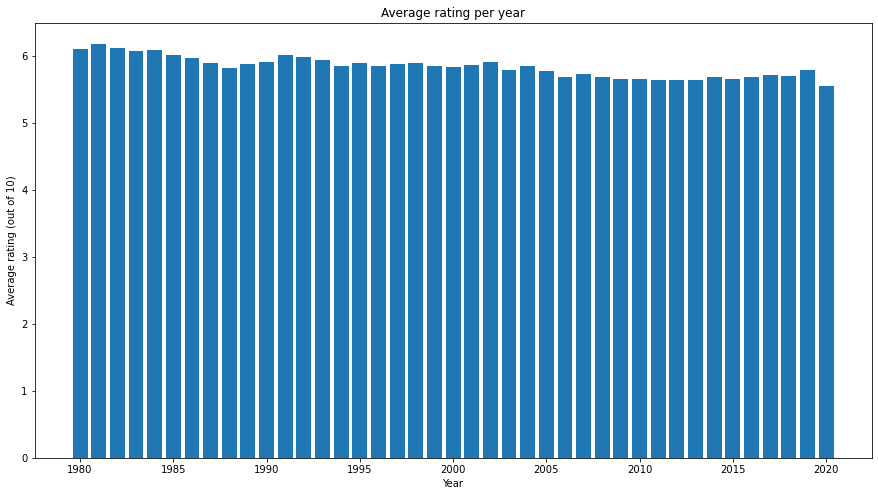

In [26]:
plt.figure(figsize = (15, 8))
x = best['Average rating'].round(decimals = 3)
y = best.index
plt.bar(y, x)
plt.title('Average rating per year')
plt.xlabel('Year')
plt.ylabel('Average rating (out of 10)')

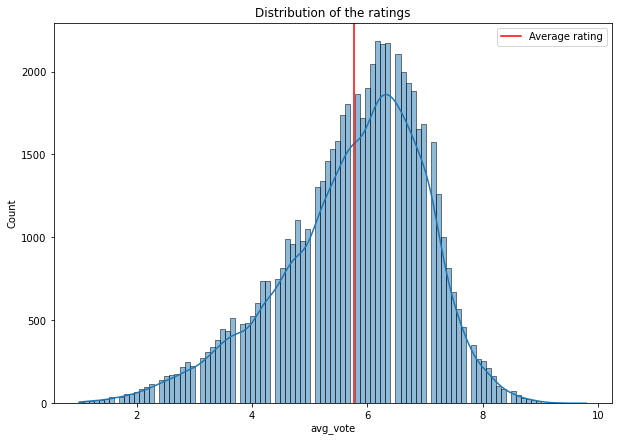

In [27]:
# Visualize the distribution of the ratings

average = new_df['avg_vote'].mean()
fig_dim = (10,7)
fig, ax = plt.subplots(figsize = fig_dim)
sns.histplot(new_df['avg_vote'], ax=ax, kde = True) #plot distribution
plt.axvline(average, color = 'red', label = 'Average rating') #plot the average
plt.legend()
plt.title('Distribution of the ratings')
plt.show()

In [36]:
# Movie Duration Distribution
year = new_df.groupby('year').agg({'duration': [np.max, np.min, np.mean]})
year.columns = ['MAX duration', 'MIN duration', 'MEAN duration']
year = year.sort_values('MEAN duration', ascending = False)
year

,MAX duration,MIN duration,MEAN duration
year,,,
2019,354,44,105.030172
2020,570,45,104.774825
1980,261,63,103.728546
1993,298,50,103.549223
2018,234,45,103.464998
1992,210,45,103.441761
1981,323,47,103.193717
1991,238,47,102.985014
2003,366,47,102.941005


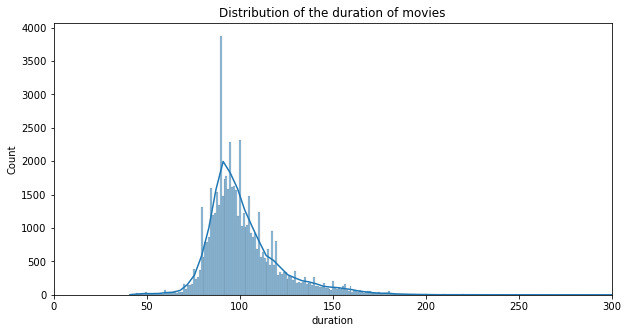

In [29]:
fig_dim = (10,5)
fig, ax = plt.subplots(figsize = fig_dim)
sns.histplot(new_df['duration'], ax=ax, kde = True)
ax.set_xlim(0,300) #limit the duration to 300 to focus where there are the most concentration
plt.title('Distribution of the duration of movies')
plt.show()

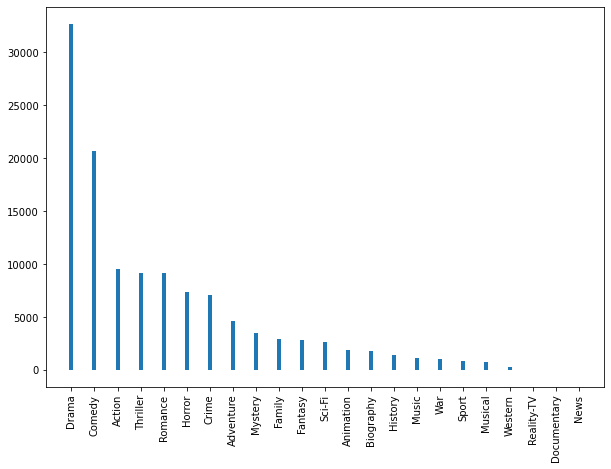

In [30]:
# Distribution by Genre

g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig_dim = (10,7)
fig, ax = plt.subplots(figsize = fig_dim)
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin = 0, ymax = y, linewidth = 4)
plt.xticks(rotation = 90)
plt.show()

In [31]:
# Top Movie Creating Countries
countries_fin = {} 
for country, no in countries.items(): 
    country = country.replace(' ', '') 
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse= True)}

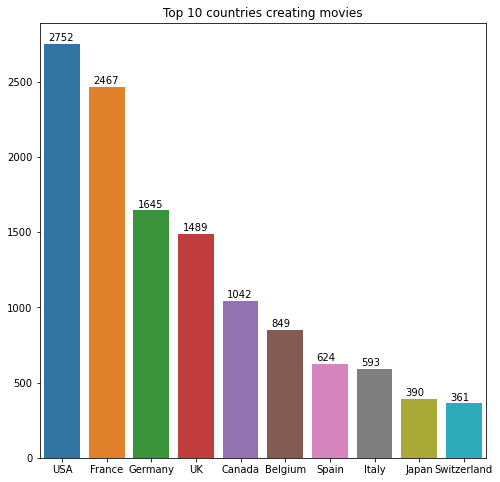

In [37]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
plt.title('Top 10 countries creating movies')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 20))